In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import warnings
import sys
import seaborn as sns
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df1=pd.read_csv(r"C:\Users\dhanu\Desktop\Mini Project\dataset\tweet dataset\tweet_emotions.csv")
df2=pd.read_csv(r"C:\Users\dhanu\Desktop\Mini Project\dataset\tweet dataset\data.csv")

In [3]:
df1.drop("tweet_id",axis=1,inplace=True)

In [4]:
df2.drop(["Sl no","Search key"],axis=1,inplace=True)

In [5]:
df2["Feeling"].unique()

array(['happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
      dtype=object)

In [6]:
u=df1["sentiment"].unique()
for i in range(len(df1)):
    if df1["sentiment"][i]=="sadness":
        df2.loc[len(df2.index)]=[df1["content"][i],"sad"]
    elif df1["sentiment"][i]=="happiness":
        df2.loc[len(df2.index)]=[df1["content"][i],"happy"]
    elif df1["sentiment"][i]=="anger":
        df2.loc[len(df2.index)]=[df1["content"][i],"angry"]
    elif df1["sentiment"][i] in ["neutral","surprise","fear","disgust"]:
        df2.loc[len(df2.index)]=[df1["content"][i],df1["sentiment"][i]]

In [7]:
df2

,Tweets,Feeling
0,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy
1,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy
2,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy
3,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy
4,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy
...,...,...
31321,@jasimmo Ooo showing of your French skills!! l...,neutral
31322,"@sendsome2me haha, yeah. Twitter has many uses...",neutral
31323,Succesfully following Tayla!!,happy
31324,@JohnLloydTaylor,neutral


<Axes: xlabel='Feeling', ylabel='count'>

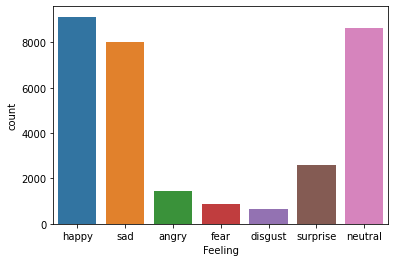

In [8]:
sns.countplot(df2.Feeling)

In [9]:
data=pd.read_csv(r"C:\Users\dhanu\Desktop\Mini Project\dataset\tweet dataset\go_emotions_dataset.csv")

In [10]:
data=data.loc[data["example_very_unclear"]==False].reset_index()
data.drop(["index","id","example_very_unclear"],axis=1,inplace=True)

In [11]:
data=data.loc[:,["text","disgust","joy","surprise","neutral","sadness","fear","anger"]]
data

,text,disgust,joy,surprise,neutral,sadness,fear,anger
0,That game hurt.,0,0,0,0,1,0,0
1,"You do right, if you don't care then fuck 'em!",0,0,0,1,0,0,0
2,Man I love reddit.,0,0,0,0,0,0,0
3,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,1,0,0,0
4,Right? Considering it’s such an important docu...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
207809,"Well, I'm glad you're out of all that now. How...",0,1,0,0,0,0,0
207810,Everyone likes [NAME].,0,0,0,0,0,0,0
207811,Well when you’ve imported about a gazillion of...,0,0,0,0,0,0,0
207812,That looks amazing,0,0,0,0,0,0,0


In [12]:
data["label"]=[0]*len(data)
for i in data.index:
    for j in data.columns[1:]:
        if data[j][i]==1:
            data["label"][i]=j
            break

In [13]:
data=data.loc[:,["text","label"]]
data=data[~(data == 0).any(axis=1)].reset_index()

<Axes: xlabel='label', ylabel='count'>

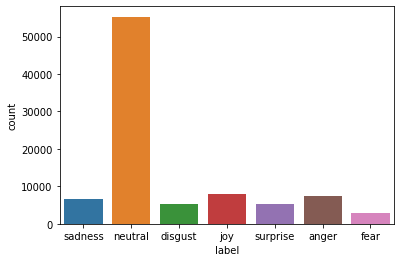

In [14]:
import seaborn as sns
sns.countplot(data.label)

In [15]:
data.drop("index",axis=1,inplace=True)

In [16]:
u=data["label"].unique()
for i in range(len(data)):
    if data["label"][i]=="sadness":
        df2.loc[len(df2.index)]=[data["text"][i],"sad"]
    elif data["label"][i]=="joy":
        df2.loc[len(df2.index)]=[data["text"][i],"happy"]
    elif data["label"][i]=="anger":
        df2.loc[len(df2.index)]=[data["text"][i],"angry"]
    elif data["label"][i] in ["neutral","surprise","fear","disgust"]:
        df2.loc[len(df2.index)]=[data["text"][i],data["label"][i]]

In [19]:
df2.to_csv("dataset.csv")

In [20]:
df2

,Tweets,Feeling
0,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy
1,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy
2,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy
3,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy
4,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy
...,...,...
122019,What a great photo and you two look so happy. 😍,happy
122020,"Wow, she headlines two shows now",neutral
122021,Youtube is my Wikipedia. Videos about any inte...,neutral
122022,"Well, I'm glad you're out of all that now. How...",happy


<Axes: xlabel='Feeling', ylabel='count'>

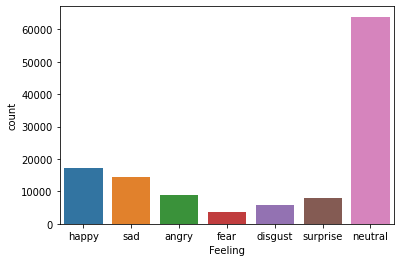

In [23]:
sns.countplot(df2.Feeling)